# A* Search

To implement A* search algorithm I am going to use computer network / Telecommunication networks as an example and have multiple computers / devices connected to each other and each link is basically any type of connection established between them (Ex: Online or wired). The edge cost will be the time taken to travel through wire. As nodes are each representing a computer so it will have certain attributes like Bandwidth and Path reliability. The heuristic function will be a custom combination of these values and delay to the goal computer.

In [1]:
class Computer_network:
    def __init__(self, adjacency_list, computer_mapping):
        self.adjacency_list = adjacency_list
        self.computer_mapping = computer_mapping
    
    def get_neighbors(self, node):
        return self.adjacency_list[node]
    
    def heuristic_function(self, n):
        node = self.computer_mapping[n]
        bandwidth = node[0]
        reliability = node[1]
        delay = node[2]
        
        return (delay*100/(bandwidth*reliability))
    
    def a_star(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
        
        while len(open_list) > 0:
            n = None
            for node in open_list:
                if n == None or g[node] + self.heuristic_function(node) < g[n] + self.heuristic_function(n):
                    n = node
            
            if n == None:
                print('No path exists...')
                return None
            
            if n == stop_node:
                path = []
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                    
                path.append(start_node)
                path.reverse()
                
                print('Path Found:', path)
                return path
        
            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                    
                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
        
            open_list.remove(n)
            closed_list.add(n)

        print('No path exists...')
        return None

In [2]:
adjacency_list = {
    'A': [('B', 2), ('C', 2), ('D', 3)],
    'B': [('A', 2)],
    'C': [('A', 2), ('E', 5)],
    'D': [('A', 3), ('E', 7 ), ('F', 6), ('G', 10)],
    'E': [('C', 5), ('D', 7), ('F', 5), ('H', 4)],
    'F': [('D', 6), ('E', 5), ('G', 2), ('H', 3)],
    'G': [('D', 10), ('F', 2), ('H', 5), ('J', 2)],
    'H': [('E', 4), ('F', 3), ('G', 5), ('I', 2)],
    'I': [('H', 2), ('J', 1)],
    'J': [('G', 2), ('I', 1)],
}

# 'Node': [banwidth, reliablity, delay]

computer_mapping = {'A': [5, 50, 20], 'B': [20, 75, 25], 'C': [40, 60, 15], 'D': [2, 25, 12], 'E': [0.5, 85, 10], 
                    'F': [40, 55, 8], 'G': [15, 75, 6], 'H': [20, 80, 7], 'I': [3, 100, 3], 'J': [10, 90, 0]}

network = Computer_network(adjacency_list, computer_mapping)
network.a_star('A', 'J')

Path Found: ['A', 'D', 'F', 'G', 'J']


['A', 'D', 'F', 'G', 'J']

### Network Visulization

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G = nx.Graph()

In [5]:
# G.add_nodes_from(adjacency_list.keys())
for node in computer_mapping:
    G.add_node(node, bw=computer_mapping[node][0],
                     r=computer_mapping[node][1],
                     sp=computer_mapping[node][2])

In [6]:
for node in adjacency_list:
    for edge in adjacency_list[node]:
        G.add_edge(node, edge[0], weight=edge[1], length=342.7)

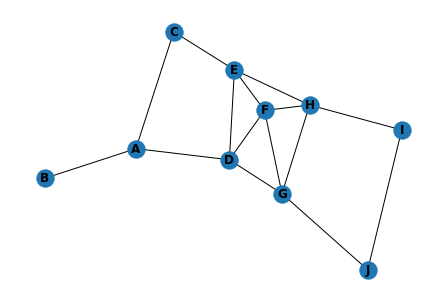

In [7]:
nx.draw(G, with_labels=True, font_weight='bold')

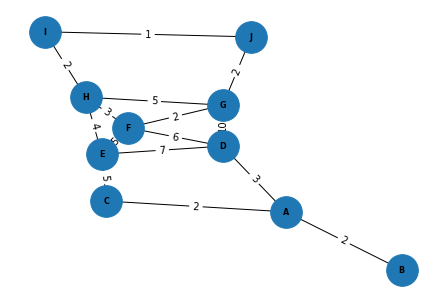

Bandwidth: {'A': 5, 'B': 20, 'C': 40, 'D': 2, 'E': 0.5, 'F': 40, 'G': 15, 'H': 20, 'I': 3, 'J': 10}
Reliability: {'A': 50, 'B': 75, 'C': 60, 'D': 25, 'E': 85, 'F': 55, 'G': 75, 'H': 80, 'I': 100, 'J': 90}
Shortest Distance: {'A': 20, 'B': 25, 'C': 15, 'D': 12, 'E': 10, 'F': 8, 'G': 6, 'H': 7, 'I': 3, 'J': 0}


In [8]:
bandwidth = nx.get_node_attributes(G,'bw')
reliability = nx.get_node_attributes(G,'r')
shotest_path = nx.get_node_attributes(G,'sp')
pos=nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos,with_labels=True, font_weight='bold', node_size=1000, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw
plt.show()
print("Bandwidth:", bandwidth)
print("Reliability:", reliability)
print("Shortest Distance:", shotest_path)

### Visulizaing The Path Found

In [9]:
network = Computer_network(adjacency_list, computer_mapping)
path = network.a_star('A', 'J')

Path Found: ['A', 'D', 'F', 'G', 'J']


In [10]:
G_path = nx.Graph()

In [11]:
for node in computer_mapping:
        G_path.add_node(node, bw=computer_mapping[node][0],
                              r=computer_mapping[node][1],
                              sp=computer_mapping[node][2])

In [12]:
color_map = []
for node in G_path:
    if node in path:
        color_map.append('red')
    else:
        color_map.append('yellow')

In [13]:
for node in adjacency_list:
    for edge in adjacency_list[node]:
        G_path.add_edge(node, edge[0], weight=edge[1], length=342.7)

In [14]:
path_index = 0
edge_colors = []
for u, v in G_path.edges():
    if(path_index < len(path)-1 and (u == path[path_index] and v==path[path_index+1])): 
        edge_colors.append('red')
        path_index += 1
    else:
        edge_colors.append('black')

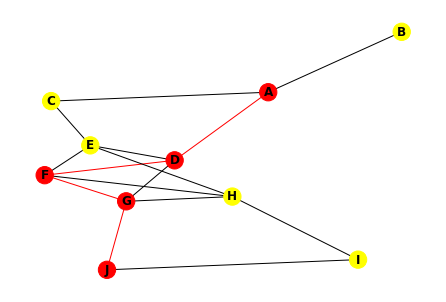

In [15]:
pos=nx.spring_layout(G)
edges = G_path.edges()
# edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G_path, pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=color_map)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

Red is the path given by A* algorithm

## Adding more complexity

Now I will add more complexity to the network by adding two types of network path between computers like online and wired. The data will have certain conditions like online only or wired only or both.

In [16]:
class Computer_network_complex:
    def __init__(self, adjacency_list_wired, adjacency_list_online,computer_mapping, packet_type = "Both"):
        self.adjacency_list_wired = adjacency_list_wired
        self.adjacency_list_online = adjacency_list_online
        self.computer_mapping = computer_mapping
        self.packet_type = packet_type; # Possible values: Wired, Wireless, Both
    
    def get_neighbors_wired(self, node):
        return self.adjacency_list_wired[node]
    
    def get_neighbors_online(self, node):
        return self.adjacency_list_online[node]
    
    def get_neighbors_both(self, node):
        neighbours = {}
        for i in adjacency_list_wired:
            neighbours[i] = self.adjacency_list_wired[i] + self.adjacency_list_online[i]
        return neighbours[node]
    
    def get_delay(self, node1, node2):
        return abs(ord(node1) - ord(node2))
    
    def heuristic_function(self, n, stop_node):
        node = self.computer_mapping[n]
        bandwidth = node[0]
        reliability = node[1]
        delay = self.get_delay(n, stop_node)
        
        return (delay*256/(bandwidth*reliability))
    
    def a_star(self, start_node, stop_node):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
        
        while len(open_list) > 0:
            n = None
            for node in open_list:
                if n == None or g[node] + self.heuristic_function(node, stop_node) < g[n] + self.heuristic_function(n, stop_node):
                    n = node
            
            if n == None:
                print('No path exists...')
                return None
            
            if n == stop_node:
                path = []
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                    
                path.append(start_node)
                path.reverse()
                
                print('Path Found:', path)
                return path
            
            if(self.packet_type == "Wired"):
                for (m, weight) in self.get_neighbors_wired(n):
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            elif(self.packet_type == "Online"):
                for (m, weight) in self.get_neighbors_online(n):
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            elif(self.packet_type == "Both"):
                for (m, weight) in self.get_neighbors_both(n):
                    if m not in open_list and m not in closed_list:
                        open_list.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight
                    else:
                        if g[m] > g[n] + weight:
                            g[m] = g[n] + weight
                            parents[m] = n

                            if m in closed_list:
                                closed_list.remove(m)
                                open_list.add(m)
            else:
                print("Inappropriate packet type selected")
                break
        
            open_list.remove(n)
            closed_list.add(n)

        print('No path exists...')
        return None

Example:
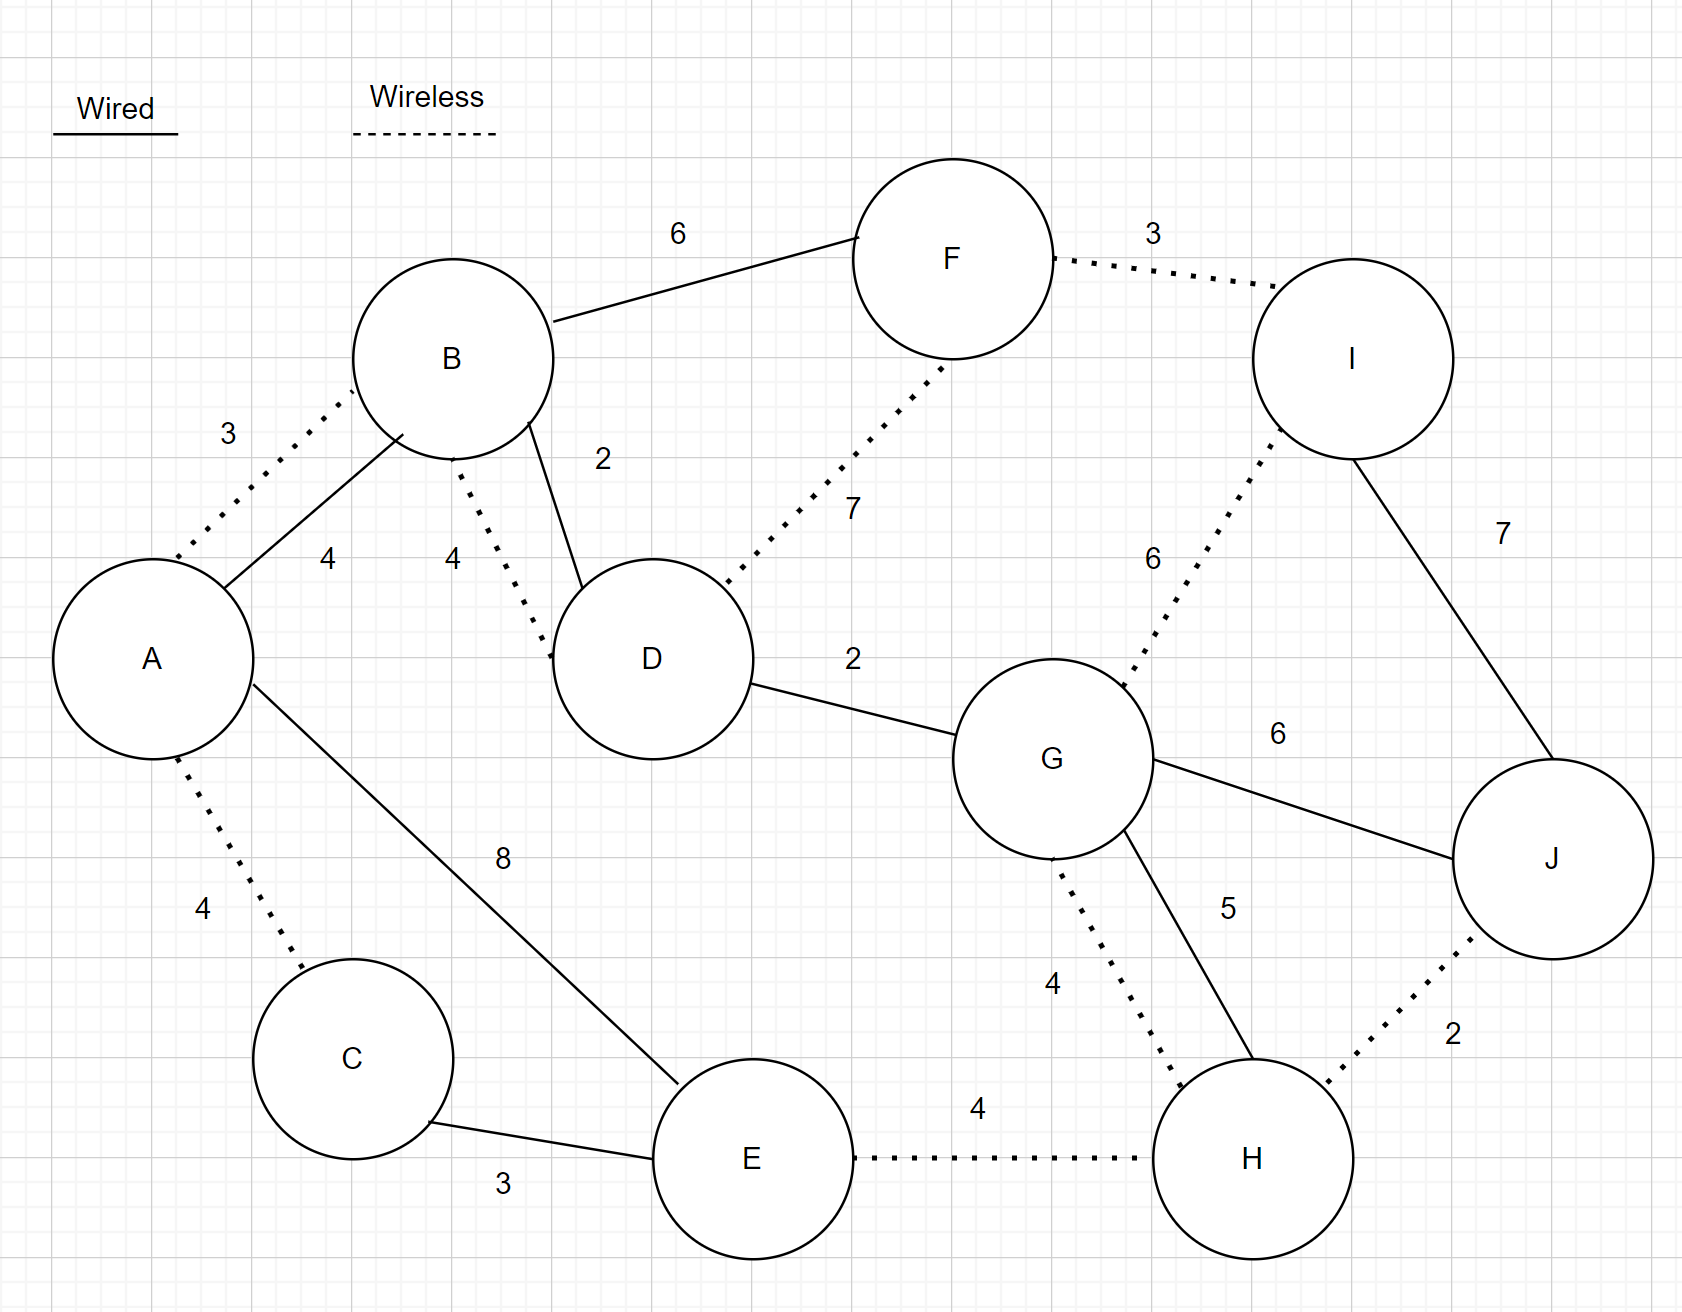

For delay heuristic value I am planning to make a custom function which will returns the ascii difference between the two node values like (|'A' - 'B'| = 1) since all nodes are in increasing order only

In [17]:
# Examples:
abs(ord('A') - ord('B'))

1

In [18]:
adjacency_list_wired = {
    'A': [('B', 4), ('E', 8)],
    'B': [('A', 4), ('D', 2), ('F', 6)],
    'C': [('E', 3)],
    'D': [('B', 2), ('G', 2)],
    'E': [('A', 8), ('C', 3)],
    'F': [('B', 6)],
    'G': [('D', 2), ('H', 5), ('J', 6)],
    'H': [('G', 5)],
    'I': [('J', 7)],
    'J': [('G', 6), ('I', 7)],
}

adjacency_list_wireless = {
    'A': [('B', 3), ('C', 4)],
    'B': [('A', 3), ('D', 4)],
    'C': [('A', 4)],
    'D': [('B', 4), ('F', 7)],
    'E': [('H', 4)],
    'F': [('D', 7), ('I', 3)],
    'G': [('H', 4), ('I', 6)],
    'H': [('E', 4), ('G', 4), ('J', 2)],
    'I': [('F', 3), ('G', 6)],
    'J': [('H', 2)],
}

# 'Node': [banwidth, reliablity, delay]

computer_mapping = {'A': [5, 50], 'B': [20, 75], 'C': [40, 60], 'D': [2, 25], 'E': [0.5, 85], 
                    'F': [40, 55], 'G': [15, 75], 'H': [20, 80], 'I': [3, 100], 'J': [10, 90]}

network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Online")
network.a_star('A', 'J')

Path Found: ['A', 'B', 'D', 'F', 'I', 'G', 'H', 'J']


['A', 'B', 'D', 'F', 'I', 'G', 'H', 'J']

In [19]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Wired")
network.a_star('A', 'J')

Path Found: ['A', 'B', 'D', 'G', 'J']


['A', 'B', 'D', 'G', 'J']

In [20]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Both")
network.a_star('A', 'J')

Path Found: ['A', 'B', 'F', 'I', 'J']


['A', 'B', 'F', 'I', 'J']

## Visulizing The complex graph path

In [21]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Both")
path = network.a_star('A', 'J')

Path Found: ['A', 'B', 'F', 'I', 'J']


In [22]:
def draw_path_graph(path):
    G_path = nx.Graph()
    for node in computer_mapping:
        G_path.add_node(node)
    for node in adjacency_list_wired:
        for edge in adjacency_list_wired[node]:
            G_path.add_edge(node, edge[0], weight=edge[1], mode="wired")

    for node in adjacency_list_wireless:
        for edge in adjacency_list_wireless[node]:
            G_path.add_edge(node, edge[0],weight=edge[1], mode="wireless")
    
    color_map = []
    for node in G_path:
        if node in path:
            color_map.append('red')
        else:
            color_map.append('yellow')
    path_index = 0
    edge_colors = []
    for u, v in G_path.edges():
        if(path_index < len(path)-1 and (u == path[path_index] and v==path[path_index+1])): 
            edge_colors.append('red')
            path_index += 1
        else:
            edge_colors.append('black')
    
    pos=nx.spring_layout(G_path)
    edges = G_path.edges()
    edge_labels = nx.get_edge_attributes(G_path, 'weight')
    nx.draw(G_path, pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=color_map)
    nx.draw_networkx_edge_labels(G_path, pos, edge_labels=edge_labels)
    plt.show()

Path Found: ['A', 'B', 'F', 'I', 'J']


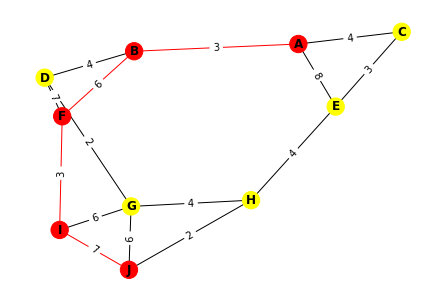

In [23]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Both")
path_wired = network.a_star('A', 'J')
draw_path_graph(path_wired)

Path Found: ['A', 'B', 'D', 'G', 'J']


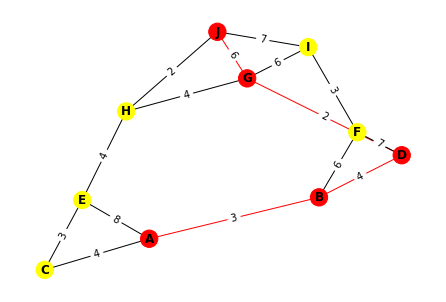

In [24]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Wired")
path_wired = network.a_star('A', 'J')
draw_path_graph(path_wired)

Path Found: ['A', 'B', 'D', 'F', 'I', 'G', 'H', 'J']


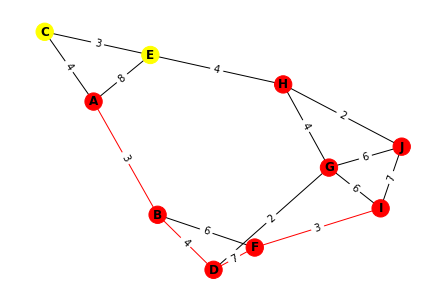

In [25]:
network = Computer_network_complex(adjacency_list_wired, adjacency_list_wireless, computer_mapping, packet_type="Online")
path_wired = network.a_star('A', 'J')
draw_path_graph(path_wired)